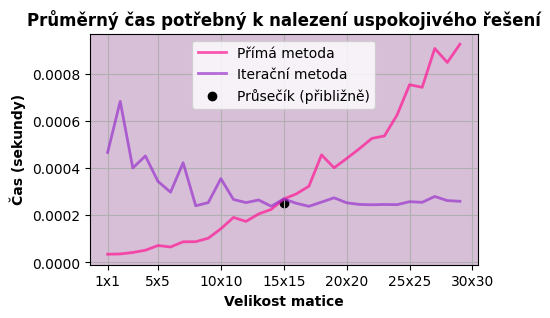

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Gaussova eliminační metoda
def prima_metoda(A, b): 
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)   
    for i in range(pocet_rovnic):
        for j in range(i + 1, pocet_rovnic):
            if rozsirena_matice[i, i] != 0: 
                pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
                rozsirena_matice[j] -= pomer * rozsirena_matice[i]
            else:
                continue 
    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        if rozsirena_matice[i, i] != 0: 
            x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
        else:
            x[i] = np.nan  
    return x

# Iterační metoda
def iteracni_metoda(A, b, max_iteraci=10, tol=1e-6):
    velikost_matice = len(A)
    reseni = np.zeros(velikost_matice)
    D = np.diag(A)
    R = A - np.diag(D) 
    for _ in range(max_iteraci):
        nove_reseni = (b - np.dot(R, reseni)) / D
        if np.allclose(nove_reseni, reseni, atol=tol):
            return nove_reseni
        x = nove_reseni
    return nove_reseni

# Generátor matice
def generator_matice(velikost):
    A = np.random.randint(1,11, size=(velikost,velikost))
    while np.linalg.matrix_rank(A) < velikost:
        A = np.random.randint(1,11,size=(velikost,velikost))
    b = np.random.randint(1, 10, size=(velikost))
    return A, b

casy_iteracni_metoda = []
casy_prima_metoda = []
velikost_matice = []

def zjisteni_casu():
    for i in range(1,30):
        velikost_matice.append(i)
        A, b = generator_matice(i)
        cas_1 = time.perf_counter()
        prima_metoda(A, b)
        casy_prima_metoda.append(time.perf_counter() - cas_1)
        cas_2 = time.perf_counter()
        iteracni_metoda(A, b)
        casy_iteracni_metoda.append(time.perf_counter() - cas_2)
 
zjisteni_casu()

plt.figure(figsize=(5,3))
plt.plot(velikost_matice, casy_prima_metoda, label="Přímá metoda", color="deeppink", linewidth = 2, alpha = 0.7)
plt.plot(velikost_matice, casy_iteracni_metoda, label="Iterační metoda",color="darkorchid",linewidth = 2, alpha = 0.7)
plt.xticks([1,5,10,15,20,25,30],["1x1","5x5","10x10","15x15","20x20","25x25","30x30"])
plt.scatter(15,0.00025, color="k", label="Průsečík (přibližně)")  
plt.xlabel("Velikost matice", fontweight="bold")
plt.ylabel("Čas (sekundy)", fontweight="bold")
plt.gca().set_facecolor("thistle")
plt.title("Průměrný čas potřebný k nalezení uspokojivého řešení", fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()


# Dle tohoto konkrétního výsledku je iterační metoda časově výhodnější od matice o rozměrech přibližně 15x15. 
# Bráno z hlediska menších velikostí matic, u většího počtu (100,200,300) se ještě budou samozřejmě občas protínat.